## 2.1 결정 트리 소개 

## 2.2 결정 트리 알고리즘

### 2.2.1 첫 번째 결정 트리 모델

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_census = pd.read_csv('data/census_cleaned.csv')

In [8]:
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
clf = DecisionTreeClassifier(random_state=2)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_pred, y_test)

0.8113253900012284

### 2.2.2 결정 트리의 작동 원리

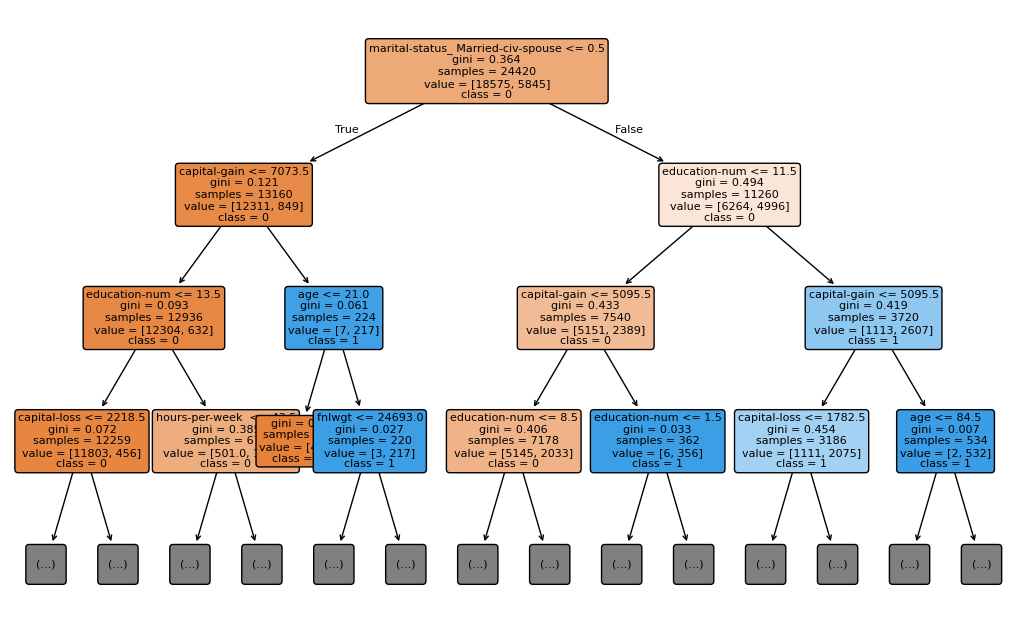

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(13, 8))
plot_tree(clf, max_depth=3, feature_names=list(X.columns), class_names=['0', '1'],
          filled=True, rounded=True, fontsize=8)
plt.show()

- 지니 불순도를 이해하기 위해 https://www.youtube.com/watch?v=ivGUsGdRxf8 를 보았음

## 2.3 분산과 편향

## 2.4 결정 트리 하이퍼파라미터 튜닝

### 2.4.1 결정 트리 회귀 모델

In [25]:
df_bikes = pd.read_csv('data/bike_rentals_cleaned.csv')

In [26]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

In [27]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [31]:
reg = DecisionTreeRegressor(random_state=2)
scores = cross_val_score(reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=5)

In [32]:
rmse = np.sqrt(-scores)
print('RMSE 평균: %0.2f' % (rmse.mean()))

RMSE 평균: 1233.36


In [33]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

In [34]:
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

np.float64(0.0)

In [35]:
leaf_node_count = 0
tree = reg.tree_
tree.node_count

1093

In [39]:
leaf_node_count = 0
for i in range(tree.node_count):
    if (tree.children_left[i] == -1) and (tree.children_right[i] == -1):
        leaf_node_count += 1
        if tree.n_node_samples[i] > 1:
            print('노드 인덱스:', i, ', 샘플 개수:', tree.n_node_samples[i])
print('전체 리프 노트 개수:', leaf_node_count)

노드 인덱스: 124 , 샘플 개수: 2
전체 리프 노트 개수: 547


### 2.4.2 하이퍼파라미터 

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [None, 2, 3, 4, 6, 8, 10, 20]}

In [43]:
reg = DecisionTreeRegressor(random_state=2)
grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=1)
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
best_params = grid_reg.best_params_
print("최상의 매개변수:", best_params)

최상의 매개변수: {'max_depth': 6}


In [47]:
best_score = np.sqrt(-grid_reg.best_score_)
print("훈련 점수: {:.3f}".format(best_score))

훈련 점수: 951.398


In [49]:
best_model = grid_reg.best_estimator_
y_pred = best_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_test, y_pred)**0.5
print("테스트 점수: {:.3f}".format(rmse_test))

테스트 점수: 864.670


In [55]:
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=1)
    grid_reg.fit(X_train, y_train)
    best_params = grid_reg.best_params_
    print("최상의 매개변수:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("훈련 점수: {:.3f}".format(best_score))
    best_model = grid_reg.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_pred)**0.5
    print("테스트 점수: {:.3f}".format(rmse_test))

In [56]:
X_train.shape

(548, 12)

In [57]:
grid_search(params={'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30]})

최상의 매개변수: {'min_samples_leaf': 8}
훈련 점수: 896.083
테스트 점수: 855.620


In [58]:
grid_search(params={
    'max_depth': [None, 2, 3, 4, 6, 8, 10, 20],
    'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30]
})

최상의 매개변수: {'max_depth': 6, 'min_samples_leaf': 2}
훈련 점수: 870.396
테스트 점수: 913.000


In [59]:
grid_search(params={
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_leaf':[3, 5, 7, 9]
})

최상의 매개변수: {'max_depth': 9, 'min_samples_leaf': 7}
훈련 점수: 888.905
테스트 점수: 878.538


### 2.4.3 정리

## 2.5 심잘 질환 예측하기 - 사례 연구

### 2.5.1 심장 질환 데이터셋

In [61]:
df_heart = pd.read_csv('data/heart_disease.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
X = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### 2.5.2 결정 트리 분류기

In [65]:
model = DecisionTreeClassifier(random_state=2)
scores = cross_val_score(model, X, y, cv=5)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.74 0.85 0.77 0.73 0.7 ]
정확도 평균: 0.76


In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    print("훈련 점수: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("테스트 점수: {:.3f}".format(accuracy))
    return best_model

### 2.5.3 하이퍼파라미터 선택

In [77]:
randomized_search_clf(
    params={
        'criterion': ['entropy', 'gini'],
        'splitter': ['random', 'best'], 
        'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf': [1, 0.001, 0.002, 0.003, 0.004],
        'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes': [10, 15, 20, 30, 35, 40, 45, 50, None],
        'max_features': [None, 2, 4, 6, 8],
        'max_depth': [None, 2,4, 6, 8],
        'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.001, 0.05]
    }
)

훈련 점수: 0.754
테스트 점수: 0.776


DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=4,
                       max_leaf_nodes=45, min_samples_leaf=0.004,
                       min_samples_split=6, random_state=2)

best_model = randomized_search_clf(
    params={
        'max_depth': [None, 6, 7],
        'max_features': ['auto', 0.78],
        'max_leaf_nodes': [45, None],
        'min_samples_leaf': [1, 0.035, 0.04, 0.045, 0.05],
        'min_samples_split': [2, 9, 10],
        'min_weight_fraction_leaf': [0.0, 0.05, 0.06, 0.07]
    }
)
best_model

In [83]:
scores = cross_val_score(best_model, X, y, cv=5)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.8  0.9  0.8  0.77 0.75]
정확도 평균: 0.80


In [87]:
from scipy.stats import loguniform
from scipy.stats import randint

In [91]:
params = {
    'max_depth': randint(1, 100),
    'max_leaf_nodes': randint(1, 100),
    'max_features': loguniform(1e-5, 1),
    'min_samples_split': loguniform(1e-5, 1),
    'min_samples_leaf': loguniform(1e-5, 1),
    'min_impurity_decrease': loguniform(1e-5, 1),
    'min_weight_fraction_leaf': loguniform(1e-5, 1)
}

dtc = DecisionTreeClassifier(random_state=0)
rs = RandomizedSearchCV(dtc, params, n_iter=100, n_jobs=-1, random_state=0)
rs.fit(X_train, y_train)

print('최상의 교차 검증 점수:', rs.best_score_)
print('최상의 매개변수:', rs.best_params_)

최상의 교차 검증 점수: 0.7932367149758455
최상의 매개변수: {'max_depth': 48, 'max_features': np.float64(0.43091880545542766), 'max_leaf_nodes': 68, 'min_impurity_decrease': np.float64(0.0013196080073784365), 'min_samples_leaf': np.float64(0.005935250363740934), 'min_samples_split': np.float64(0.0002724316743777187), 'min_weight_fraction_leaf': np.float64(0.0341093569075626)}


### 2.5.5 특성 중요도

In [93]:
best_model.fit(X, y)

DecisionTreeClassifier(max_features=0.78, max_leaf_nodes=45,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [94]:
best_model.feature_importances_

array([0.04830121, 0.04008887, 0.47546568, 0.        , 0.        ,
       0.        , 0.        , 0.00976578, 0.        , 0.02445397,
       0.02316427, 0.1774694 , 0.20129082])

In [97]:
feature_dict = dict(zip(X.columns, best_model.feature_importances_))
import operator
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)

[('cp', np.float64(0.4754656785718367)),
 ('thal', np.float64(0.20129082387838435)),
 ('ca', np.float64(0.17746940422139018)),
 ('age', np.float64(0.04830121072010349)),
 ('sex', np.float64(0.040088871741503336)),
 ('oldpeak', np.float64(0.024453967068879784)),
 ('slope', np.float64(0.02316426846239502)),
 ('thalach', np.float64(0.00976577533550723)),
 ('trestbps', np.float64(0.0)),
 ('chol', np.float64(0.0)),
 ('fbs', np.float64(0.0)),
 ('restecg', np.float64(0.0)),
 ('exang', np.float64(0.0))]

In [98]:
from sklearn.inspection import permutation_importance

In [101]:
result = permutation_importance(best_model, X, y, n_jobs=-1, random_state=0)
feature_dict = dict(zip(X.columns, result.importances_mean))
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('thal', np.float64(0.08712871287128716)),
 ('cp', np.float64(0.08118811881188122)),
 ('ca', np.float64(0.05940594059405944))]

## 2.6 마치며